# AIPI 590
> ## Assignment 3 - Interpretable ML
> ## Keese Phillips

In [1]:
!pip install pygam --quiet

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import Log
from statsmodels.tools import add_constant
from pygam import LinearGAM, GammaGAM, s

In [3]:
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('telco_customer_churn')

df = pd.read_csv('telco_customer_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
def ordinal_encode(X,cols):
    """
    Takes a dataframe as an input and applies ordinal encoding to the
    specified columns

    Inputs:
        X(pd.DataFrame): dataframe
        cols(list): list of columns to ordinal encode

    Return:
        X(pd.DataFrame): dataframe
        enc: ordinal encoder
    """
    enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    # Fit the encoder on training data and transform it.  We can also use it to transform test data
    X[cols] = enc.fit_transform(X[cols])
    return X,enc

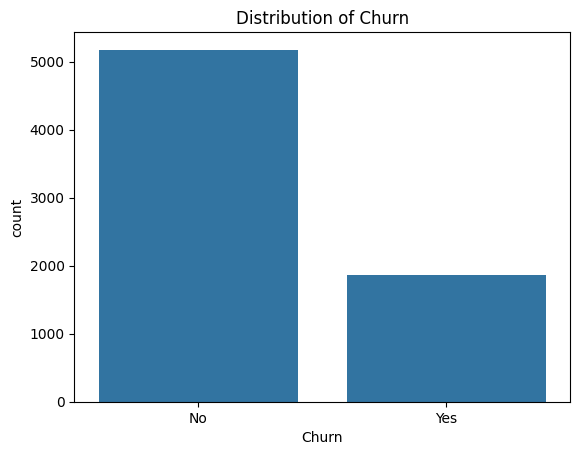

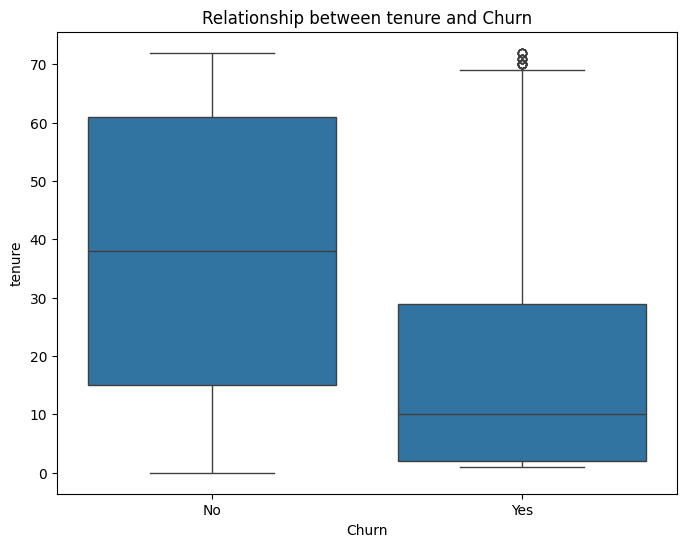

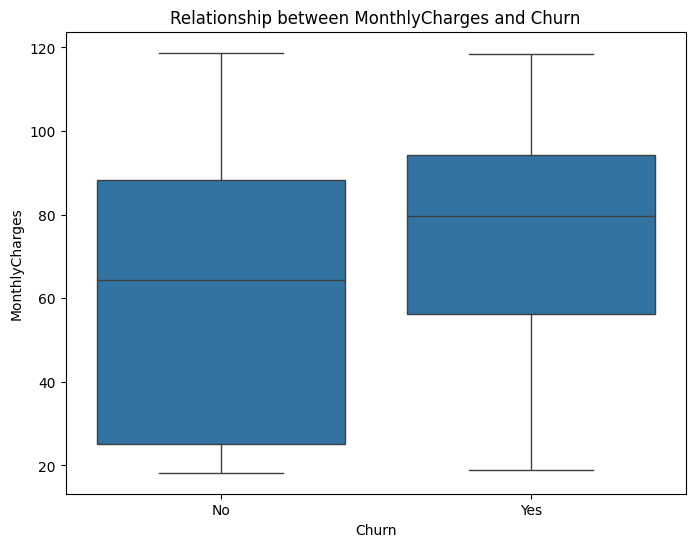

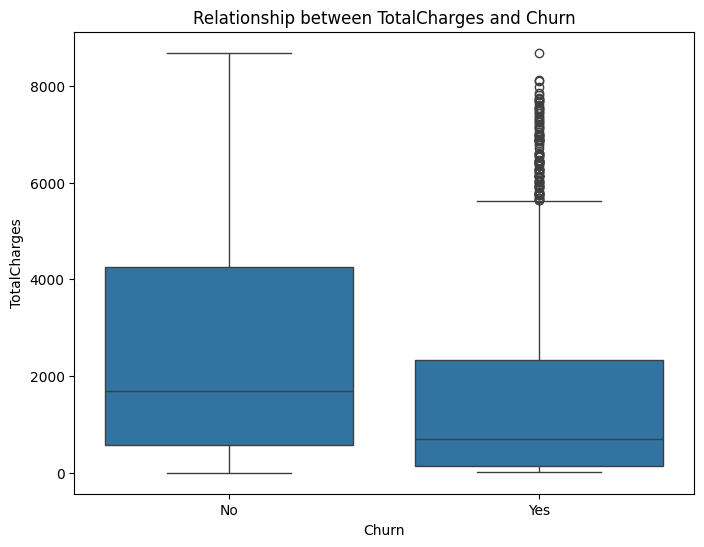

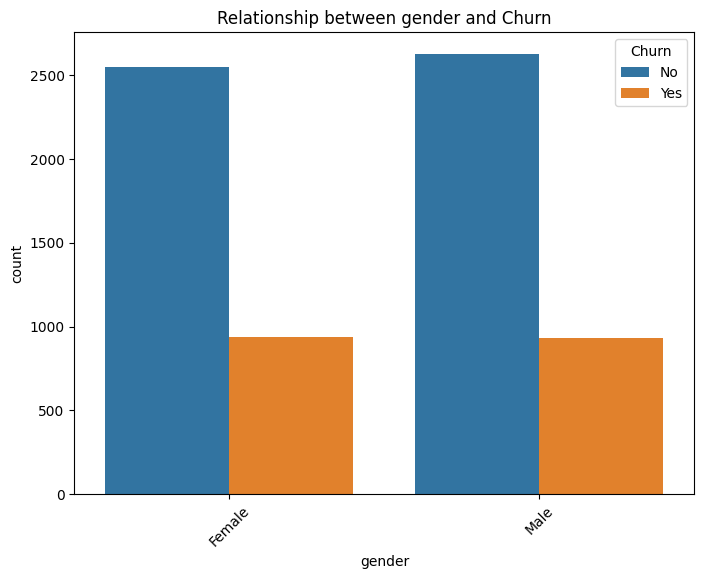

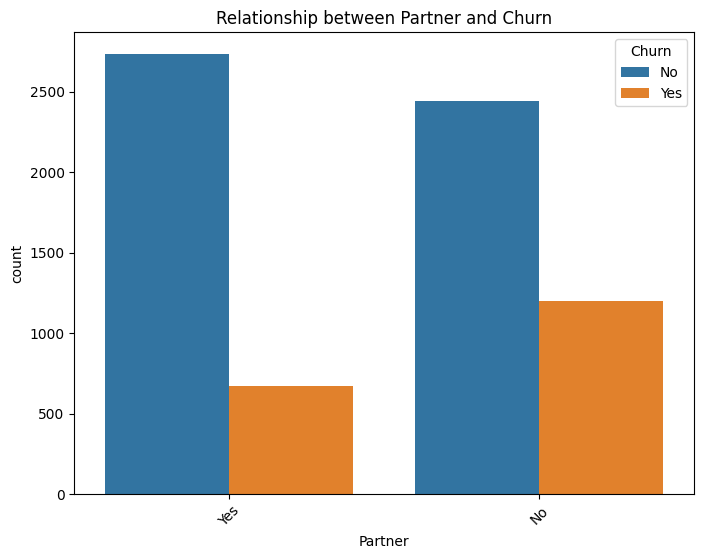

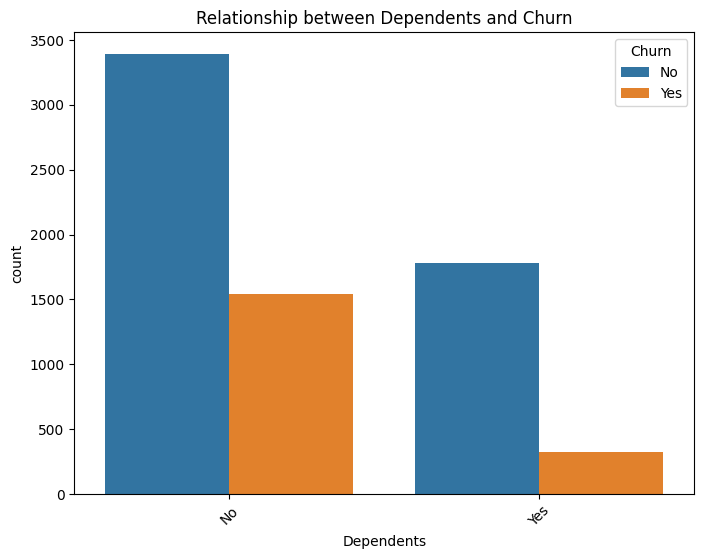

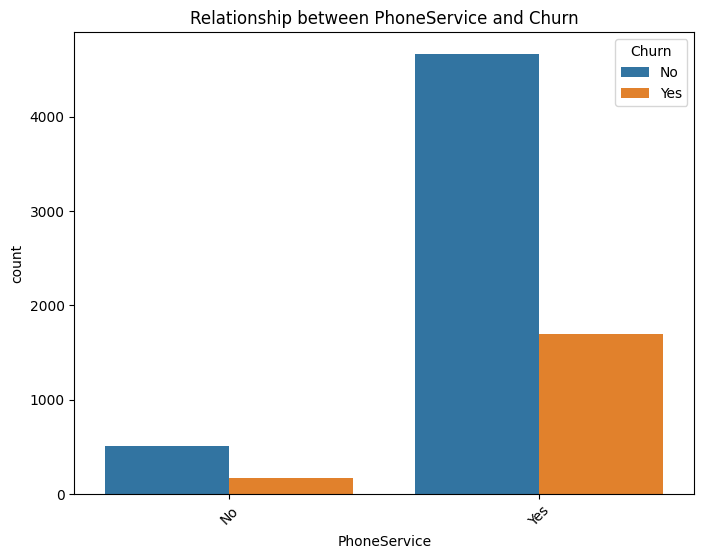

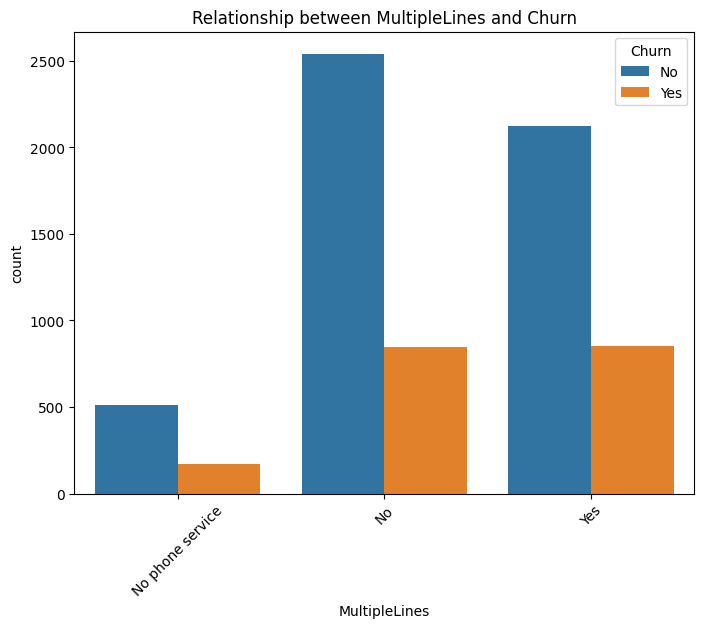

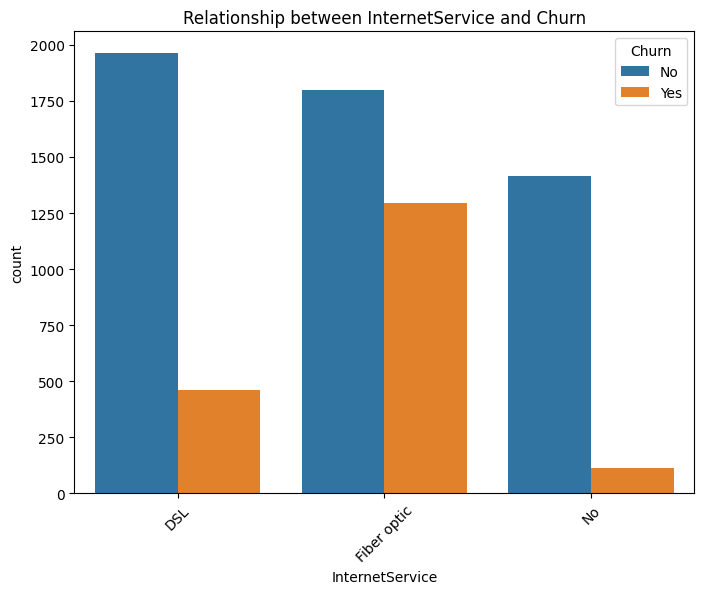

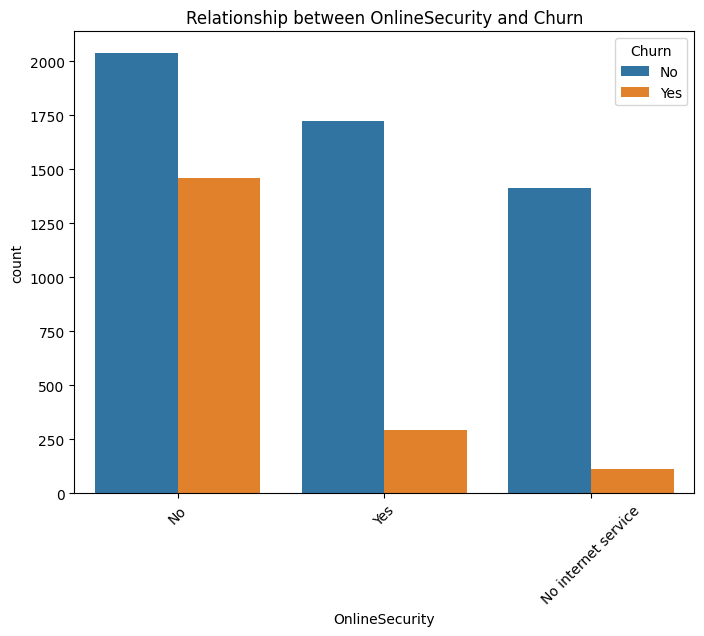

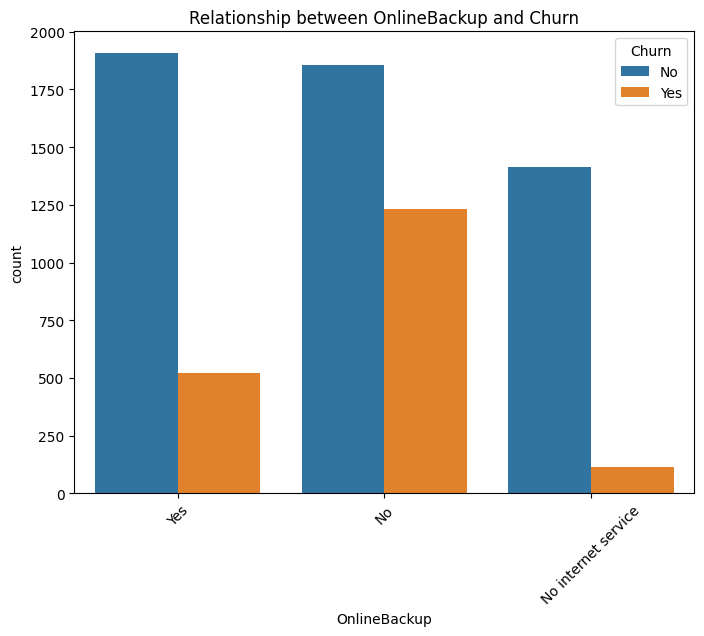

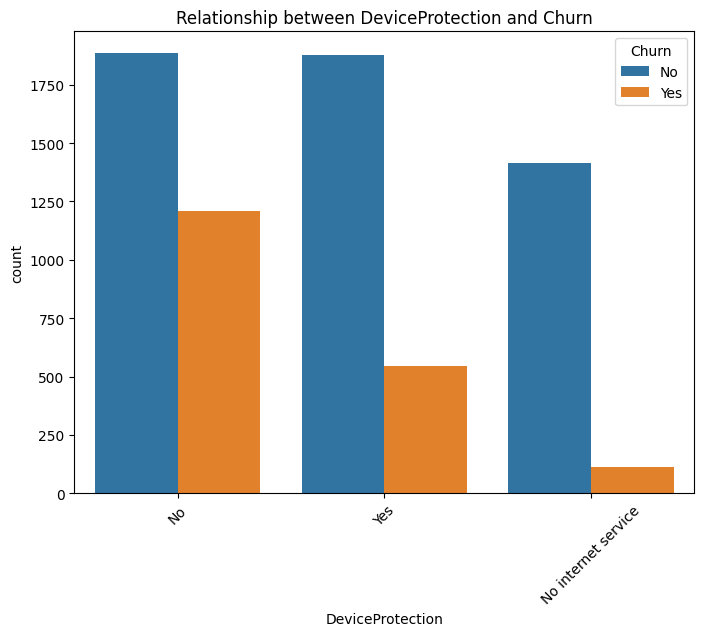

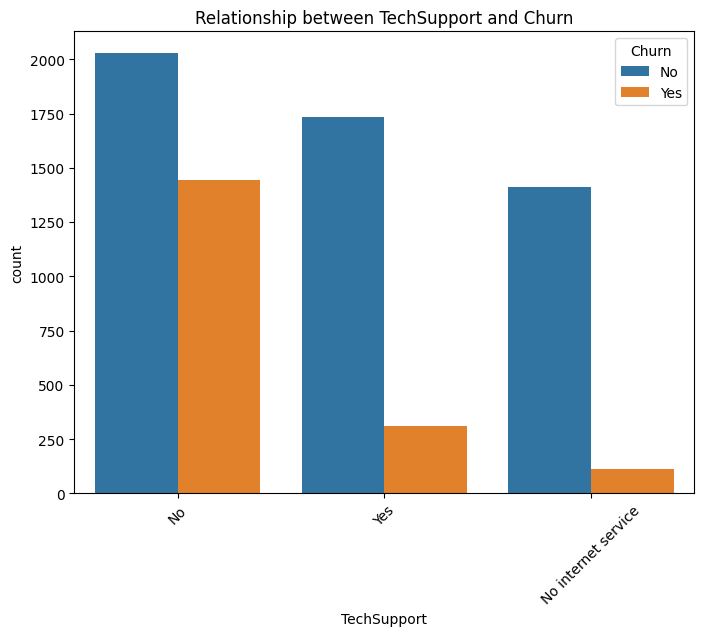

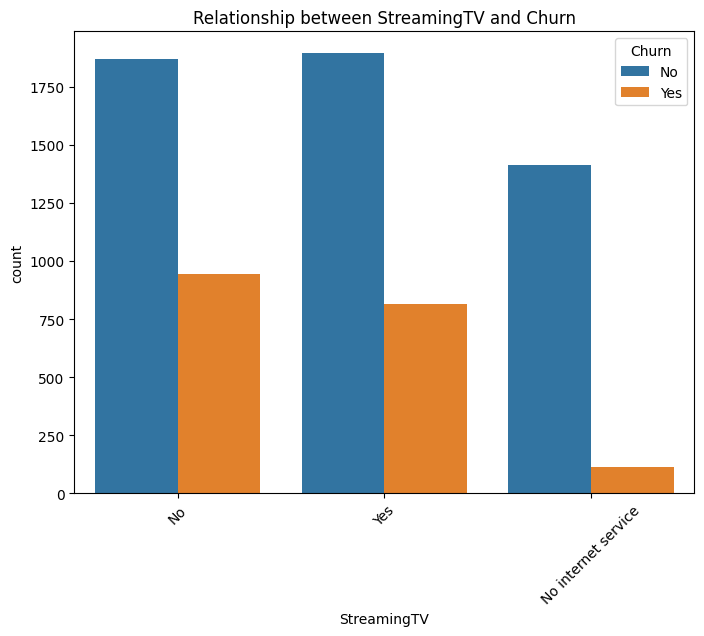

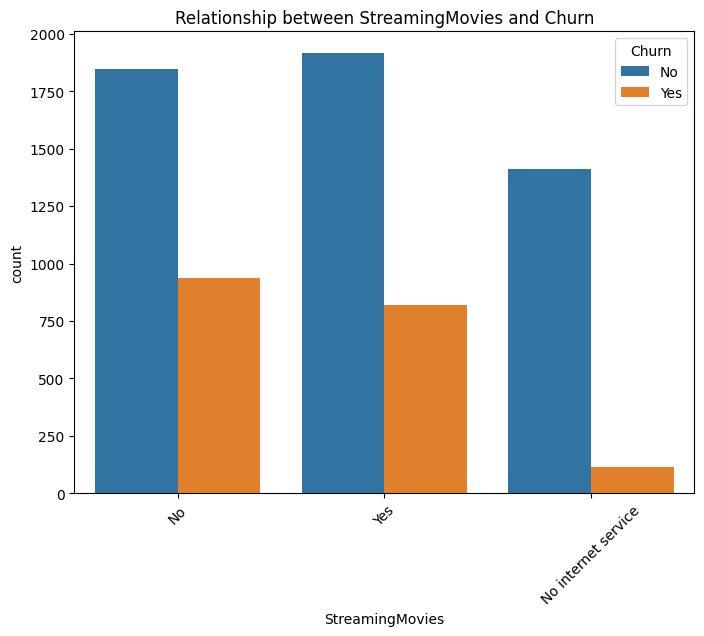

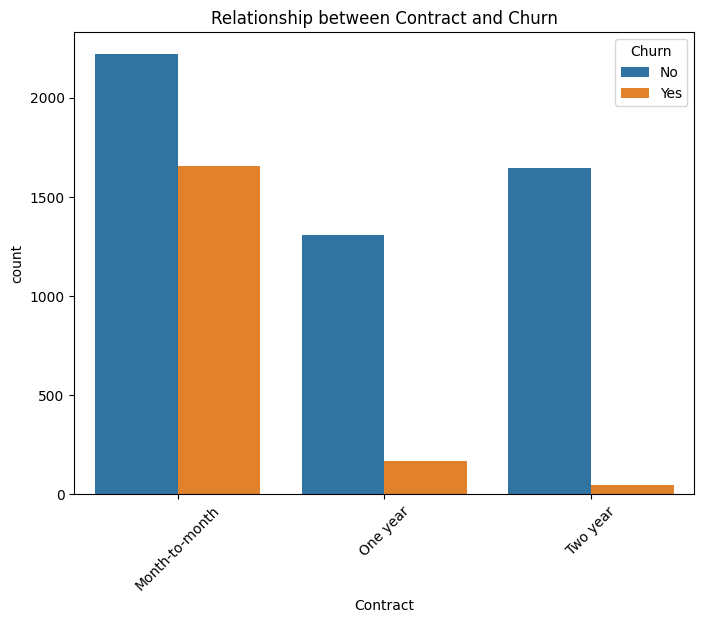

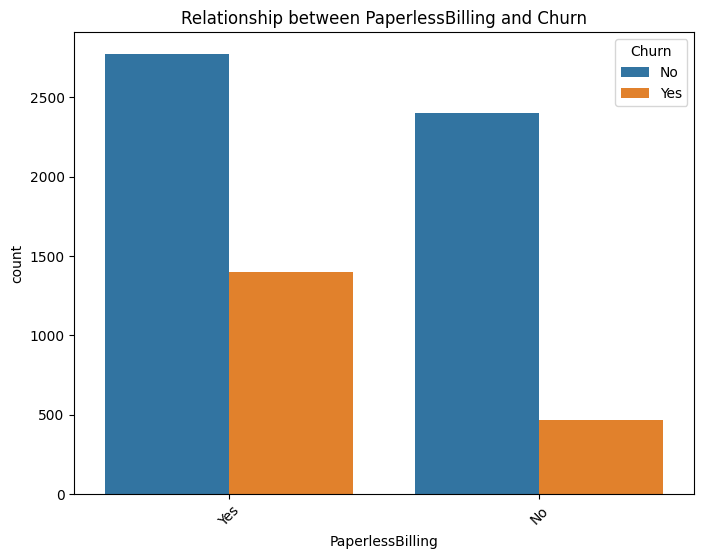

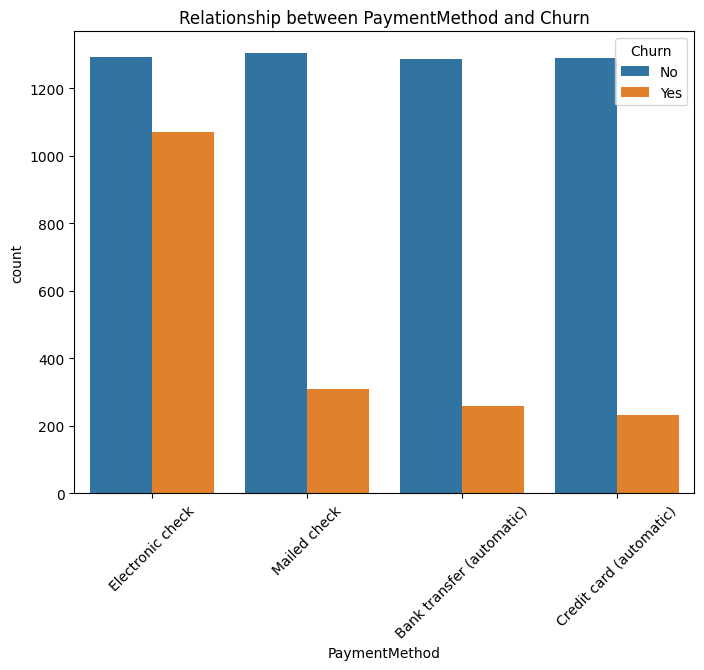

In [5]:
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='Churn', y=feature, data=df)
  plt.title(f'Relationship between {feature} and Churn')
  plt.show()

categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, hue='Churn', data=df)
  plt.title(f'Relationship between {feature} and Churn')
  plt.xticks(rotation=45)
  plt.show()

In [6]:
X = df.drop(['customerID','Churn'], axis=1)
y = df[['Churn']]

X,enc = ordinal_encode(X,['gender',  'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'])

y,enc = ordinal_encode(y,['Churn'])

X.replace(' ', 0, inplace=True)

<ipython-input-4-edbc827ec6b3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols] = enc.fit_transform(X[cols])


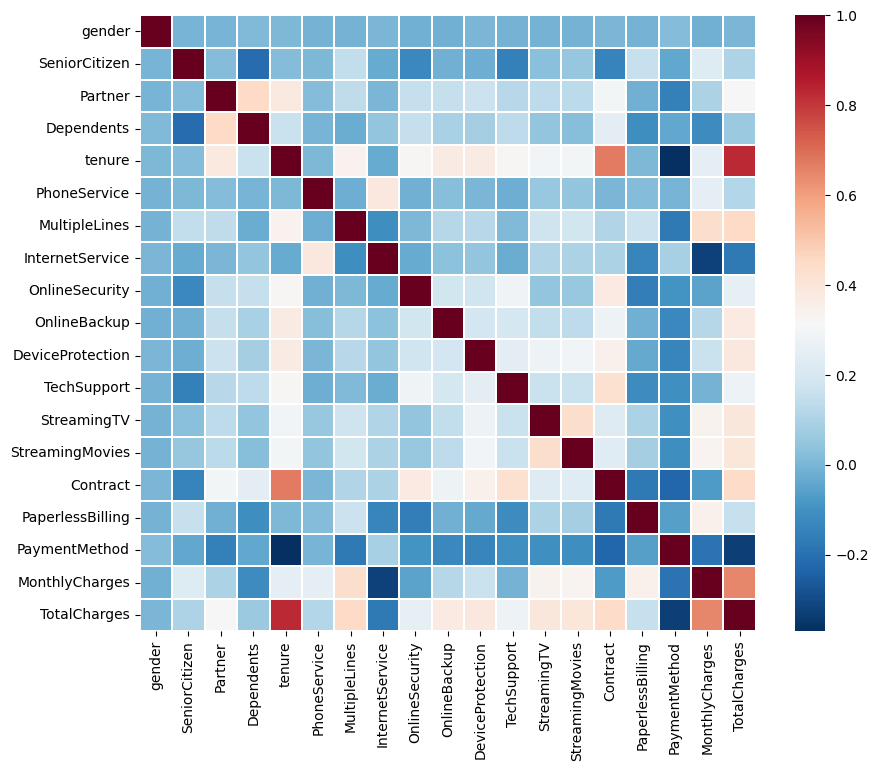

In [7]:
# Examine correlations between variables using correlation matrix
plt.figure(figsize=(10,8))
cm = X.corr(method='pearson')
sns.heatmap(cm, cmap = 'RdBu_r',linewidth=0.01,square=True)
plt.show()

### Exploratory Data Analysis to check Assumptions:
The features seem to be mostly independent from one another as seen in the correlation matrix. The features also appear to be independent of the target as seen in the feature charts above.

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [9]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initialize the Linear Model
lin_model = LinearRegression()

# Fit the model on the training set
lin_model.fit(X_train_scaled, y_train)

# Predict the test set using the model
lin_test_preds = lin_model.predict(X_test_scaled)

<Figure size 1200x600 with 0 Axes>

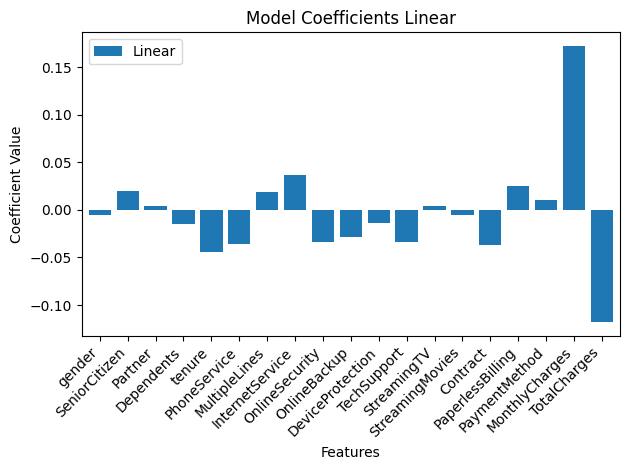

y = 0.266 + -0.005*gender + 0.020*SeniorCitizen + 0.004*Partner + -0.014*Dependents + -0.044*tenure + -0.036*PhoneService + 0.019*MultipleLines + 0.036*InternetService + -0.034*OnlineSecurity + -0.028*OnlineBackup + -0.014*DeviceProtection + -0.033*TechSupport + 0.004*StreamingTV + -0.005*StreamingMovies + -0.037*Contract + 0.025*PaperlessBilling + 0.011*PaymentMethod + 0.172*MonthlyCharges + -0.118*TotalCharges


In [11]:
def plot_coefficients(X, model, model_name):
    coef_df = pd.DataFrame({
        model_name: model.coef_[0],
    }, index=X.columns)

    plt.figure(figsize=(12, 6))
    coef_df.plot(kind='bar', width=0.8)
    plt.title(f'Model Coefficients {model_name}')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.legend(loc='best')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


plot_coefficients(X, lin_model, 'Linear')
coef = lin_model.coef_[0]
intercept = lin_model.intercept_[0]

# Print out the equation
equation = 'y = {:.3f} + '.format(intercept) + ' + '.join(['{:.3f}*{}'.format(coef,var) for coef,var in zip(coef,X_train.columns)])
print(equation)

### Linear Regression
The largest absolute coefficients of monthly charges and total charges have the biggest impact on chrun. An increase in one unit of monthly charge the churn increases by 0.172, whereas an increase in total charges decreases the churn by 0.118.

In [12]:
# Initialize the Log Model
log_model = LogisticRegression(penalty=None)

# Fit the model on the training set
log_model.fit(X_train_scaled,y_train)

# Predict the test set using the model
log_test_preds = log_model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 1200x600 with 0 Axes>

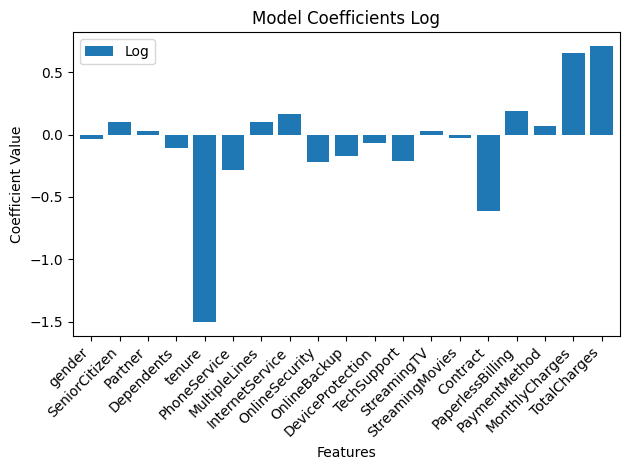

y = -1.760 + -0.036*gender + 0.100*SeniorCitizen + 0.031*Partner + -0.105*Dependents + -1.504*tenure + -0.283*PhoneService + 0.104*MultipleLines + 0.169*InternetService + -0.219*OnlineSecurity + -0.169*OnlineBackup + -0.068*DeviceProtection + -0.211*TechSupport + 0.033*StreamingTV + -0.027*StreamingMovies + -0.613*Contract + 0.192*PaperlessBilling + 0.072*PaymentMethod + 0.659*MonthlyCharges + 0.710*TotalCharges


In [13]:
plot_coefficients(X, log_model, 'Log')
coef = log_model.coef_[0]
intercept = log_model.intercept_[0]

# Print out the equation
equation = 'y = {:.3f} + '.format(intercept) + ' + '.join(['{:.3f}*{}'.format(coef,var) for coef,var in zip(coef,X_train.columns)])
print(equation)

### Logistic Regression
The largest absolute coefficients of tenure, monthly charges, and total charges have the biggest impact on chrun. An increase in one unit of tenure decreases the churn odds ratio by 1.504, an one unit increase in monthly charge increases the churn odds ratio by 0.659, an one unit increase  in total charges increases the churn odds ratio by 0.710.

In [14]:
# Initilize GAM
gam_model = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) )

# Find best smoothing parameters for each spline term
gam_model.gridsearch(X_train_scaled, y_train)

# Fit the model on the training set
gam_model.fit(X_train_scaled, y_train)

# Predict the test set
gam_test_preds = gam_model.predict(X_test_scaled)

100% (11 of 11) |########################| Elapsed Time: 0:00:33 Time:  0:00:33


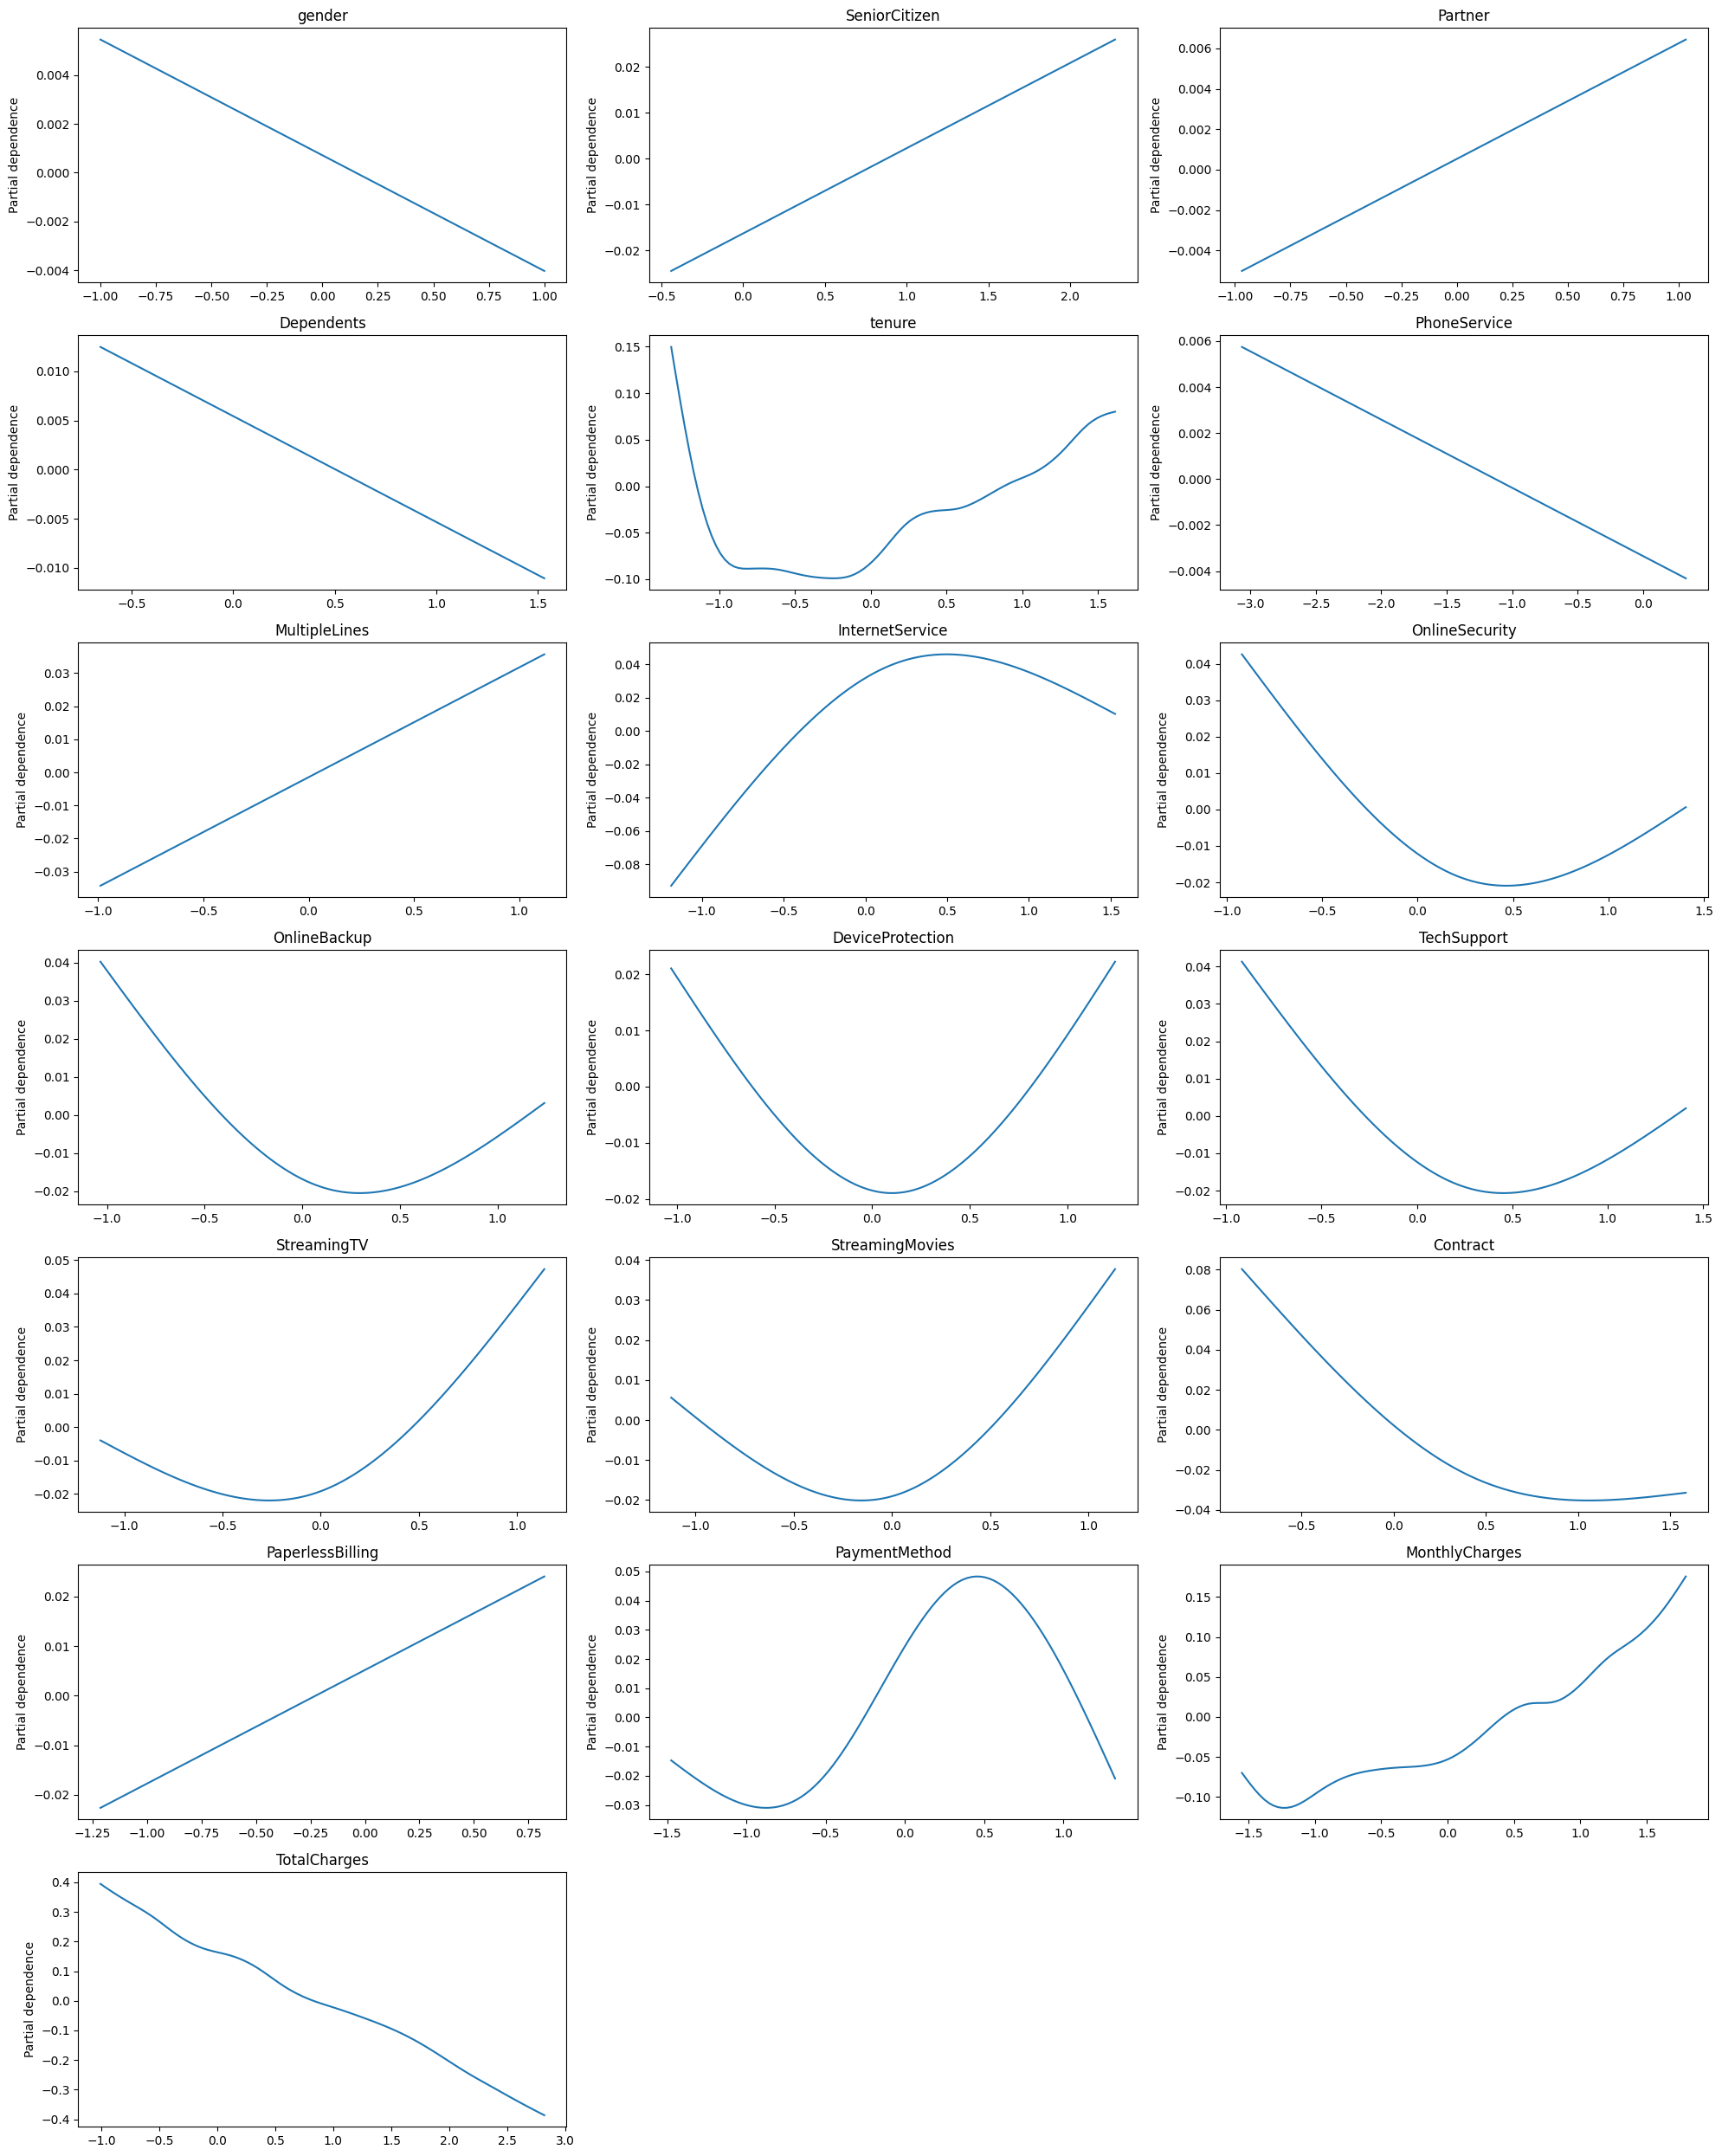

In [15]:
def plot_gam(X, gam_model):
  plt.figure(figsize=(20, 25))
  for i, term in enumerate(gam_model.terms):
      if term.isintercept:
          continue
      plt.subplot(7, 3, i+1)
      XX = gam_model.generate_X_grid(term=i)
      plt.plot(XX[:, term.feature], gam_model.partial_dependence(term=i, X=XX))
      plt.title(X.columns[i])
      plt.ylabel('Partial dependence')
  plt.tight_layout()
  plt.show()

plot_gam(X, gam_model)

### Generalized Additive Model
The model features when plotted show how each partially effects the churn. One sees how total charges have a negative relationship on churn whereas monthly charges have a positive relationship with churn. Tenure has a convex relationship with churn.

In [16]:
thresh = 0.5
lin_test_preds = np.where(lin_test_preds >= thresh, 1, 0)
log_test_preds = np.where(log_test_preds >= thresh, 1, 0)
gam_test_preds = np.where(gam_test_preds >= thresh, 1, 0)

In [17]:
print("Linear Regression Results")
print(classification_report(y_test, lin_test_preds))
print(f"Accuracy: {accuracy_score(y_test, lin_test_preds):.4f}")
print(f"Precision: {precision_score(y_test, lin_test_preds, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, lin_test_preds, average='weighted'):.4f}")
print()

print("Log Regression Results")
print(classification_report(y_test,log_test_preds))
print(f"Accuracy: {accuracy_score(y_test, log_test_preds):.4f}")
print(f"Precision: {precision_score(y_test, log_test_preds, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, log_test_preds, average='weighted'):.4f}")
print()

print("GAM Results")
print(classification_report(y_test,gam_test_preds))
print(f"Accuracy: {accuracy_score(y_test, gam_test_preds):.4f}")
print(f"Precision: {precision_score(y_test, gam_test_preds, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, gam_test_preds, average='weighted'):.4f}")

Linear Regression Results
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1041
         1.0       0.63      0.48      0.55       368

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.7921
Precision: 0.7796
Recall: 0.7921

Log Regression Results
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1041
         1.0       0.62      0.52      0.57       368

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

Accuracy: 0.7928
Precision: 0.7838
Recall: 0.7928

GAM Results
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1041
         1.0       0.64      0.47      0.54       368

    accuracy       

# Model Comparison
### Linear Regression
- Strengths:
  - Linear regression is easy to understand
  - The coefficients can be easily interpreted as the effect of each feature on the target variable

- Weaknesses:
  - The model has a low recall for predicting churn, indicating that it misses many actual churn cases
  - The model assumes linear relationships, which may not capture the complexity of customer behavior effectively

### Logistic Regression
- Strengths:
  - The coefficients can be interpreted in terms of odds ratios

- Weaknesses:
  - The model has a slightly better than linear regression,but it still has a low recall, indicating that many churn cases are not being identified
  - The model assumes a linear relationship between features and the target


### Generalized Additive Models (GAM)
- Strengths:
  - GAMs allow for non-linear relationships, which can better capture complex patterns in customer behavior
  - Partial dependence can be visualized to understand how each feature effects churn holding all others constant

- Weaknesses:
  - Lower precision and recall compared to logistic regression or linear regression

# Recommendations
All three models performed very similarily on the accuracy metric.
The logistic regression should most likely be used by the telecommunications company because of its slightly higher level of accuracy. The GAM model does provide useful information as to how each feature impacts the Churn. The prioritazation of lower  monthly and total charges should allow the company to positively impact their churn rate all else being equal.